In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
# Create Dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           class_sep=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [15]:
# Random Forest
param_grid_rf = {'max_features':[2,3,4,5],
              'max_leaf_nodes':[4,5,6,7,8],
              'n_estimators':[50,100,150,200]}

rf = RandomForestClassifier(random_state=42)
model1 = GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,n_jobs=-1).fit(X=X_train,y=y_train)

# Gradient Boosting
param_grid_gb = {'max_features':[2,3,4,5],
                  'max_leaf_nodes':[4,5,6,7,8],
                  'n_estimators':[50,100,150,200],
                  'learning_rate':[0.01,0.05,0.1]}

gb = GradientBoostingClassifier(random_state=42)
model2 = GridSearchCV(estimator=gb,param_grid=param_grid_gb,cv=5,n_jobs=-1).fit(X=X_train,y=y_train)

# Results
rf_best_params = model1.best_estimator_.get_params()
gb_best_params = model2.best_estimator_.get_params()

rf_best_params_subset = {key:rf_best_params[key] for key in list(param_grid_rf.keys())}
gb_best_params_subset = {key:gb_best_params[key] for key in list(param_grid_gb.keys())}

print(
f"""After running gridsearch CV on both random forests and gradient boosting we get the following hyperparameters:

Random Forest: {rf_best_params_subset}

Gradient Boosting: {gb_best_params_subset}"""
)

After running gridsearch CV on both random forests and gradient boosting we get the following hyperparameters:

Random Forest: {'max_features': 5, 'max_leaf_nodes': 7, 'n_estimators': 200}

Gradient Boosting: {'max_features': 5, 'max_leaf_nodes': 6, 'n_estimators': 50, 'learning_rate': 0.05}


**Accuracy + Confusion Matrix**


The accuracy for Random Forest: 0.835.
The accuracy for Gradient Boosting: 0.844.



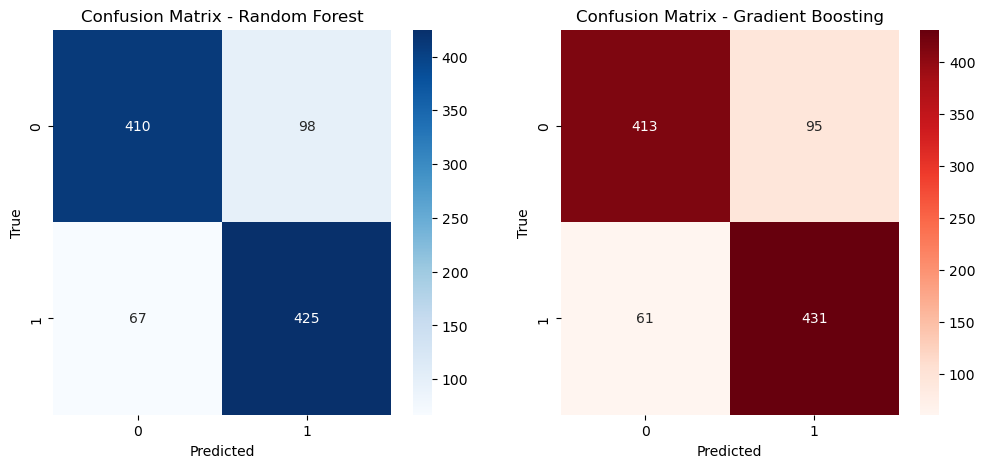

In [16]:
def evaluate(X_tr,y_tr,X_ts,y_ts,model,params:dict):
    model = model(**params)
    fit = model.fit(X=X_tr,y=y_tr)
    y_pred = fit.predict(X=X_ts)
    accuracy = accuracy_score(y_pred=y_pred,y_true=y_ts)
    return {'model':model,'fit':fit,'accuracy':accuracy,'y_pred':y_pred}

rf_results = evaluate(X_train,y_train,X_test,y_test,model=RandomForestClassifier,params=rf_best_params)
gb_results = evaluate(X_train,y_train,X_test,y_test,model=GradientBoostingClassifier,params=gb_best_params)

print(f"""
The accuracy for Random Forest: {rf_results['accuracy']}.
The accuracy for Gradient Boosting: {gb_results['accuracy']}.
""")

cm_rf = confusion_matrix(y_test, rf_results['y_pred'])
cm_gb = confusion_matrix(y_test, gb_results['y_pred'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Random Forest')

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Reds',ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix - Gradient Boosting')

plt.show()

The gradient boosting slightly outperforms random forest at the cost of increased computational costs.

**Top 10 Features**

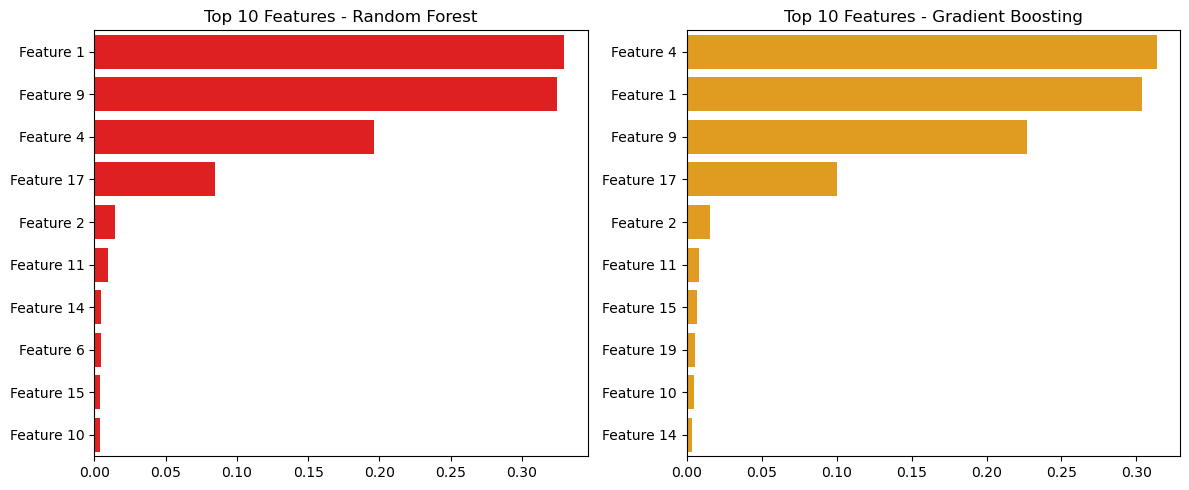

In [17]:
importances_rf = rf_results['fit'].feature_importances_
top_rf_idx = np.argsort(importances_rf)[::-1][:10]

importances_gb = gb_results['fit'].feature_importances_
top_gb_idx = np.argsort(importances_gb)[::-1][:10]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=importances_rf[top_rf_idx], y=[f"Feature {i}" for i in top_rf_idx], color='red')
plt.title("Top 10 Features - Random Forest")
plt.subplot(1, 2, 2)
sns.barplot(x=importances_gb[top_gb_idx], y=[f"Feature {i}" for i in top_gb_idx],color='orange')
plt.title("Top 10 Features - Gradient Boosting")
plt.tight_layout()
plt.show()

It appears that both models have similar important features. Features 4 and 9 are assigned the most difference in importance across methods.